In [17]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import os

%matplotlib inline
path_data = os.path.join('..', 'data')

In [8]:
# data = pd.read_csv('tickers_train.csv')
data = pd.read_csv(os.path.join(path_data, 'train', 'tickers_train.csv'))

In [9]:
data.head()

,Unnamed: 0,datetime,name,priceBtc,priceUsd,ticker,volume
0,0,2018-03-01T00:00:00Z,0x,0.000087,0.902278,ZRX,8127100.0
1,1,2018-03-01T02:00:00Z,0x,0.000086,0.895107,ZRX,7962720.0
2,2,2018-03-01T04:00:00Z,0x,0.000088,0.917095,ZRX,7980440.0
3,3,2018-03-01T06:00:00Z,0x,0.000087,0.910295,ZRX,7554380.0
4,4,2018-03-01T08:00:00Z,0x,0.000087,0.927460,ZRX,7468790.0


In [11]:
df_y_train = pd.pivot_table(data, 
    values=['priceBtc', 'priceUsd', 'volume'], 
    index=['datetime'],
    columns=['ticker'])#.head()
df_y_train.sort_index(inplace=True)
df_y_train.index = pd.Series(pd.to_datetime(np.array(df_y_train.index))).apply(lambda x: x.timestamp())
print('index dif :', set(np.array(df_y_train.index[1:]) - np.array(df_y_train.index[:-1])))

index dif : {7200.0}


In [12]:
df_y_train.head()

priceBtc                                                        \
ticker           $PAC       1ST 1WO       ABT      ACAT       ACC       ACT   
1.519852e+09      NaN  0.000029 NaN  0.000114  0.000001  0.000100  0.000035   
1.519859e+09      NaN  0.000028 NaN  0.000115  0.000001  0.000107  0.000035   
1.519866e+09      NaN  0.000029 NaN  0.000115  0.000001  0.000110  0.000036   
1.519873e+09      NaN  0.000029 NaN  0.000115  0.000001  0.000103  0.000035   
1.519880e+09      NaN  0.000027 NaN  0.000114  0.000001  0.000100  0.000035   

                                        ...          volume             \
ticker             ADA       ADB ADH    ...             XVG        XZC   
1.519852e+09  0.000030  0.000002 NaN    ...      18653700.0  3852160.0   
1.519859e+09  0.000029  0.000002 NaN    ...      18850700.0  3857900.0   
1.519866e+09  0.000029  0.000002 NaN    ...      18282600.0  4010780.0   
1.519873e+09  0.000028  0.000002 NaN    ...      18203200.0  3993010.0   
1.519880e+09  0.000028  0.000002 NaN    ...      17933400.0  3689700.0   

                                                                            \
ticker                ZCL ZCO         ZEC        ZEN        ZIL        ZLA   
1.519852e+09  109027000.0 NaN  54766800.0  2259440.0  8196340.0  1453870.0   
1.519859e+09  106212000.0 NaN  53604900.0  2577900.0  7909660.0  1327050.0   
1.519866e+09  104332000.0 NaN  53318000.0  2740920.0  7671810.0  1137000.0   
1.519873e+09  109475000.0 NaN  53300600.0  2953900.0  7742030.0  1103730.0   
1.519880e+09   99679900.0 NaN  51532800.0  2749000.0  7918250.0  1096540.0   

                                    
ticker              ZPT        ZRX  
1.519852e+09  3449770.0  8127100.0  
1.519859e+09  3444390.0  7962720.0  
1.519866e+09  2562270.0  7980440.0  
1.519873e+09  5068710.0  7554380.0  
1.519880e+09  5489550.0  7468790.0  

[5 rows x 1527 columns]

In [26]:
corr = df_y_train['priceBtc'].corr(method='spearman')

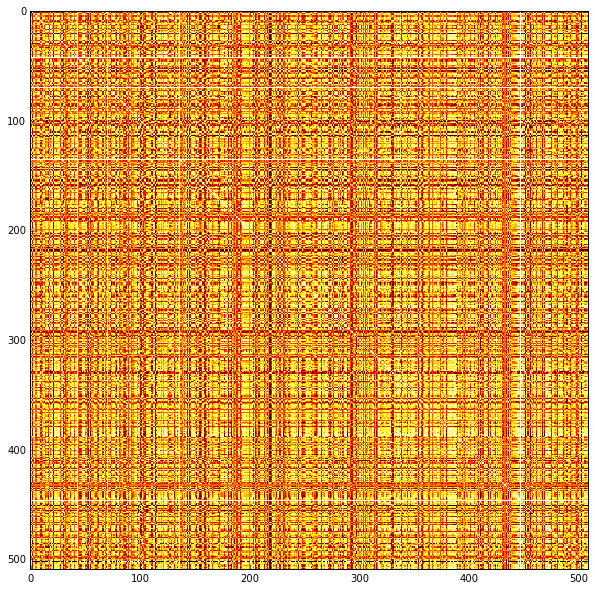

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(corr,cmap='hot',interpolation='nearest')